In [2]:
!pip install numpy
!pip install torch==0.4.1.post2
!pip install torchvision==0.1.8

     |████████████████████████████████| 519.5MB 18kB/s 
ERROR: torchvision 0.9.0+cu101 has requirement torch==1.8.0, but you'll have torch 0.4.1.post2 which is incompatible.
ERROR: torchtext 0.9.0 has requirement torch==1.8.0, but you'll have torch 0.4.1.post2 which is incompatible.
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.1.post2 which is incompatible.
  Found existing installation: torch 1.8.0+cu101
    Uninstalling torch-1.8.0+cu101:
      Successfully uninstalled torch-1.8.0+cu101
ERROR: fastai 1.0.61 has requirement torch>=1.0.0, but you'll have torch 0.4.1.post2 which is incompatible.
  Found existing installation: torchvision 0.9.0+cu101
    Uninstalling torchvision-0.9.0+cu101:
      Successfully uninstalled torchvision-0.9.0+cu101


In [3]:
import pickle
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
!python run_mnist.py --output_dir content/output

In [4]:
with open('content/output/dataset_mnist__no_dropout_False__seed_1__sorting_file_none__remove_n_0__keep_lowest_n_0__stats_dict.pkl', 'rb') as f:
    data = pickle.load(f)

In [19]:
!python order_examples_by_forgetting.py --input_dir /content --output_dir /content/output --output_name test

Namespace(epochs=200, input_dir='/content', input_fname_args=None, output_dir='/content/output', output_name='test')
including file: dataset_mnist__no_dropout_False__seed_1__sorting_file_none__remove_n_0__keep_lowest_n_0__stats_dict.pkl
Number of unforgettable examples: 21967


In [20]:
with open('output/test.pkl', 'rb') as f:
    fevents_data = pickle.load(f)

In [5]:
data_items = data.items()
data_values = np.asarray(list(data.values()))
data2 = np.asarray(list(data_items))

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [6]:
#0-64 - train data
#65-60002 - test data

data2_train = data2[0:64,:]
data2_test = data2[65:60002,:]

#testlist = np.array(data2_test[154,1])
#plt.plot(testlist[1,:],'o')
#plt.show()

def dataslicer(data):
  testlist = np.array(data2_test[0,1])
  loss = np.array(testlist[0,:])
  forgetting_events = np.array(testlist[1,:])
  margin = np.array(testlist[2,:])
  for i in range(1,10000):
    testlist = np.array(data[i,1])
    loss = np.vstack((loss,np.array(testlist[0,:])))
    forgetting_events = np.vstack((forgetting_events,np.array(testlist[1,:])))
    margin = np.vstack((margin,np.array(testlist[2,:])))
  return loss, forgetting_events, margin

lss, fev, marg = dataslicer(data2_test)

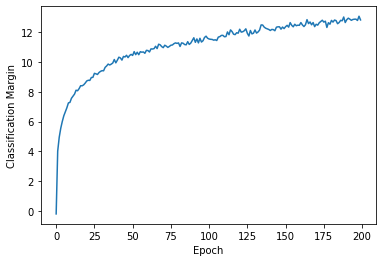

In [11]:
plt.plot(marg.mean(axis=0))
plt.xlabel('Epoch')
plt.ylabel('Classification Margin')
plt.show()

In [28]:
#Data from console output
validation = [0.0820,93.86,0.0137,95.83,0.0023,96.92,0.0042,97.38,0.0011,97.66,0.0025,97.98,0.0006,98.24,0.0011,98.27,0.0019,98.26,0.0008,98.46,0.0013,98.58,0.0029,98.66,0.0024,98.56,0.0010,98.65,0.0054,98.69,0.0012,98.71,0.0006,98.70,0.0006,98.74,0.0017,98.81,0.0011,98.70,0.0033,98.75,0.0004,98.78,0.0016,98.91,0.0006,98.86,0.0012,98.88,0.0005,98.89,0.0015,98.94,0.0005,98.94,0.0003,98.99,0.0007,98.92,0.0025,98.92,0.0005,98.91,0.0006,99.00,0.0004,98.94,0.0009,98.80,0.0001,98.86,0.0001,98.95,0.0004,98.91,0.0009,99.01,0.0005,99.00,0.0005,99.02,0.0006,98.93,0.0004,99.04,0.0005,98.99,0.0007,99.05,0.0004,98.87,0.0003,98.97,0.0009,98.88,0.0011,99.08,0.0001,99.06,0.0005,99.01,0.0006,99.03,0.0006,99.00,0.0005,99.07,0.0003,99.04,0.0002,99.00,0.0003,98.96,0.0001,99.11,0.0004,99.05,0.0001,99.03,0.0006,99.01,0.0001,99.06,0.0002,99.05,0.0003,99.10,0.0004,99.09,0.0002,99.00,0.0006,99.03,0.0003,99.11,0.0002,99.02,0.0004,99.07,0.0003,98.96,0.0002,99.08,0.0003,99.00,0.0008,99.13,0.0002,98.94,0.0008,99.14,0.0002,99.05,0.0002,99.12,0.0001,99.10,0.0001,99.13,0.0003,99.10,0.0000,99.13,0.0001,99.09,0.0002,99.05,0.0004,99.07,0.0000,99.04,0.0004,99.14,0.0003,99.00,0.0000,99.07,0.0001,99.09,0.0001,98.95,0.0001,99.15,0.0001,99.10,0.0001,99.13,0.0001,99.10,0.0001,99.13,0.0001,99.07,0.0004,99.11,0.0001,99.15,0.0003,99.08,0.0002,98.98,0.0001,99.10,0.0010,99.09,0.0002,99.12,0.0002,99.15,0.0002,99.14,0.0000,99.06,0.0001,99.14,0.0001,99.05,0.0001,99.12,0.0001,99.13,0.0001,99.05,0.0001,99.07,0.0002,99.16,0.0001,99.13,0.0001,99.17,0.0001,99.11,0.0001,98.93,0.0001,99.11,0.0003,99.15,0.0002,99.05,0.0002,99.08,0.0001,99.03,0.0001,99.03,0.0000,99.13,0.0002,99.01,0.0001,99.14,0.0001,99.15,0.0002,99.13,0.0001,99.16,0.0001,99.16,0.0002,99.14,0.0000,99.14,0.0000,99.15,0.0000,99.12,0.0002,99.13,0.0002,99.17,0.0001,99.14,0.0002,99.11,0.0000,99.08,0.0001,99.12,0.0001,99.13,0.0000,99.08,0.0002,99.18,0.0001,99.18,0.0001,99.15,0.0000,99.21,0.0000,99.15,0.0002,99.11,0.0000,99.05,0.0002,99.09,0.0001,99.20,0.0001,99.15,0.0000,99.12,0.0000,99.17,0.0000,99.09,0.0000,99.09,0.0000,99.09,0.0000,99.10,0.0002,99.12,0.0001,99.07,0.0000,99.10,0.0000,99.15,0.0000,99.09,0.0001,99.03,0.0000,99.10,0.0000,99.11,0.0000,99.16,0.0001,99.14,0.0001,99.11,0.0000,99.12,0.0001,99.12,0.0000,99.14,0.0000,99.08,0.0000,99.15,0.0000,99.11,0.0000,99.07,0.0000,99.11,0.0000,99.17,0.0000,99.13,0.0000,99.10,0.0000,99.15,0.0000,99.08,0.0000,99.12,0.0000,99.09,0.0001,99.13,0.0000,99.13,0.0000,99.10,0.0000,99.14,0.0000,99.15,0.0000,99.22,0.0001,99.17,0.0000,99.12,0.0000,99.16,0.0000,99.17,0.0000,99.13,0.0001,99.17,0.0000,99.12,0.0000,99.09,0.0000,99.13]
epoch = [0.4985,68.690,0.7908,88.215,0.1297,91.025,0.2393,92.357,0.0734,93.237,0.0722,93.742,0.1826,94.242,0.1694,94.517,0.1928,94.898,0.0933,95.117,0.2044,95.242,0.0318,95.497,0.1783,95.460,0.1687,95.662,0.4028,95.647,0.1371,95.777,0.1597,95.888,0.3073,95.893,0.0275,96.047,0.4708,96.200,0.1149,96.160,0.1637,96.115,0.0138,96.245,0.0777,96.322,0.0605,96.280,0.0235,96.410,0.0541,96.448,0.0745,96.415,0.1580,96.490,0.0633,96.502,0.0385,96.533,0.2800,96.572,0.1348,96.520,0.1671,96.718,0.0122,96.740,0.4259,96.805,0.1363,96.800,0.0588,96.810,0.1067,96.908,0.0362,96.767,0.2105,96.753,0.0244,96.892,0.0523,96.833,0.2529,96.787,0.0314,96.948,0.0479,97.028,0.0902,96.935,0.0076,96.925,0.0625,97.015,0.0254,96.930,0.0793,97.035,0.0488,97.033,0.0210,97.120,0.0198,97.078,0.0179,97.038,0.3736,97.132,0.1274,96.983,0.0757,97.143,0.0053,97.115,0.5480,97.195,0.0679,97.132,0.0080,97.167,0.0865,97.273,0.1658,97.258,0.0167,97.167,0.1459,97.312,0.0173,97.182,0.0478,97.307,0.0690,97.197,0.0946,97.263,0.1344,97.235,0.0362,97.237,0.1096,97.313,0.0939,97.308,0.1400,97.265,0.2547,97.190,0.1065,97.315,0.0215,97.390,0.1196,97.290,0.0393,97.402,0.4428,97.435,0.0757,97.195,0.2992,97.437,0.0890,97.278,0.0230,97.338,0.0255,97.360,0.2415,97.405,0.0620,97.425,0.0769,97.365,0.0607,97.385,0.1782,97.342,0.0598,97.313,0.0142,97.470,0.0040,97.423,0.1755,97.498,0.0750,97.345,0.0290,97.512,0.0939,97.528,0.1228,97.430,0.0146,97.355,0.0422,97.458,0.0038,97.332,0.0198,97.407,0.0392,97.513,0.0375,97.368,0.0643,97.457,0.0940,97.550,0.0257,97.527,0.1099,97.583,0.0081,97.445,0.0074,97.523,0.0739,97.458,0.1081,97.608,0.0412,97.520,0.0253,97.520,0.2639,97.560,0.0535,97.583,0.0974,97.503,0.0679,97.507,0.0054,97.567,0.0026,97.538,0.0477,97.578,0.0458,97.575,0.1883,97.600,0.1600,97.557,0.0979,97.563,0.0199,97.507,0.0781,97.568,0.2977,97.523,0.0028,97.572,0.0330,97.560,0.0049,97.510,0.1738,97.552,0.0675,97.705,0.0447,97.608,0.0767,97.662,0.0618,97.630,0.0333,97.650,0.0382,97.663,0.0708,97.563,0.1728,97.645,0.0183,97.575,0.0431,97.628,0.0338,97.572,0.0362,97.648,0.0548,97.780,0.2894,97.703,0.0964,97.673,0.1522,97.627,0.0244,97.638,0.0055,97.645,0.1638,97.770,0.0867,97.750,0.1727,97.658,0.0897,97.723,0.1149,97.642,0.0806,97.637,0.0251,97.632,0.0338,97.735,0.1181,97.715,0.0082,97.720,0.0277,97.702,0.0413,97.730,0.0603,97.720,0.0072,97.703,0.0236,97.675,0.0253,97.695,0.0121,97.768,0.1541,97.733,0.0049,97.698,0.0404,97.768,0.0676,97.698,0.1029,97.815,0.0172,97.772,0.1898,97.757,0.2795,97.790,0.0188,97.612,0.0273,97.657,0.1782,97.700,0.0403,97.767,0.0765,97.778,0.0104,97.813,0.0659,97.798,0.2799,97.780,0.0778,97.742,0.0936,97.778,0.0873,97.755,0.0374,97.765,0.0729,97.760,0.1552,97.743,0.1573,97.798,0.0177,97.847,0.0138,97.832,0.2333,97.745,0.0074,97.797,0.1509,97.757,0.0098,97.740,0.0602,97.732,0.0321,97.813,0.1608,97.692]

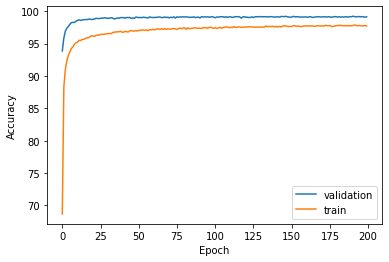

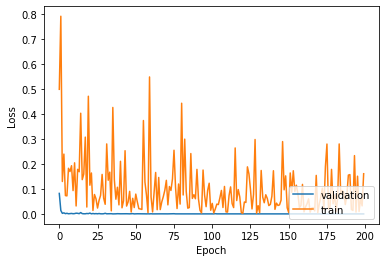

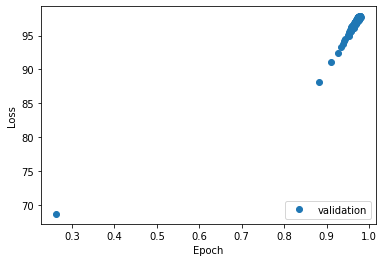

In [14]:
epoch = np.asarray(epoch)
epoch = epoch.reshape(200,2)

validation = np.asarray(validation)
validation = validation.reshape(200,2)

plt.plot()
plt.plot(validation[:,1])
plt.plot(epoch[:,1])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(["validation", "train"], loc ="lower right") 
plt.show()

plt.plot(validation[:,0])
plt.plot(epoch[:,0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["validation", "train"], loc ="lower right") 
plt.show()

plt.plot(fev.mean(axis=0),epoch[:,1],'o')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(["validation", "train"], loc ="lower right") 
plt.show()



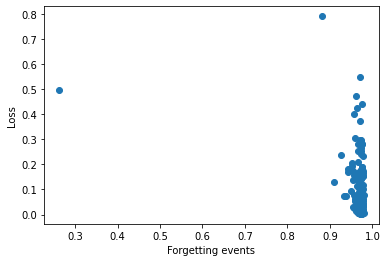

In [24]:
plt.plot(fev.mean(axis=0),epoch[:,0],'o')
plt.xlabel('Forgetting events')
plt.ylabel('Loss')
#plt.legend(["validation", "epoch"], loc ="upper right") 
plt.show()

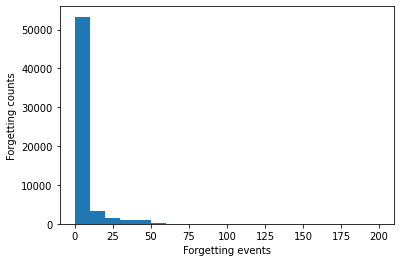

In [27]:
data_items = fevents_data.items()
data_values = np.asarray(list(fevents_data.values()))

plt.hist(data_values[1],bins=20)
plt.xlabel('Forgetting events')
plt.ylabel('Forgetting counts')
#plt.legend(["validation", "epoch"], loc ="upper right") 
plt.show()